![WhatsApp Image 2025-02-10 at 12.33.22 PM.jpeg](<attachment:WhatsApp Image 2025-02-10 at 12.33.22 PM.jpeg>)
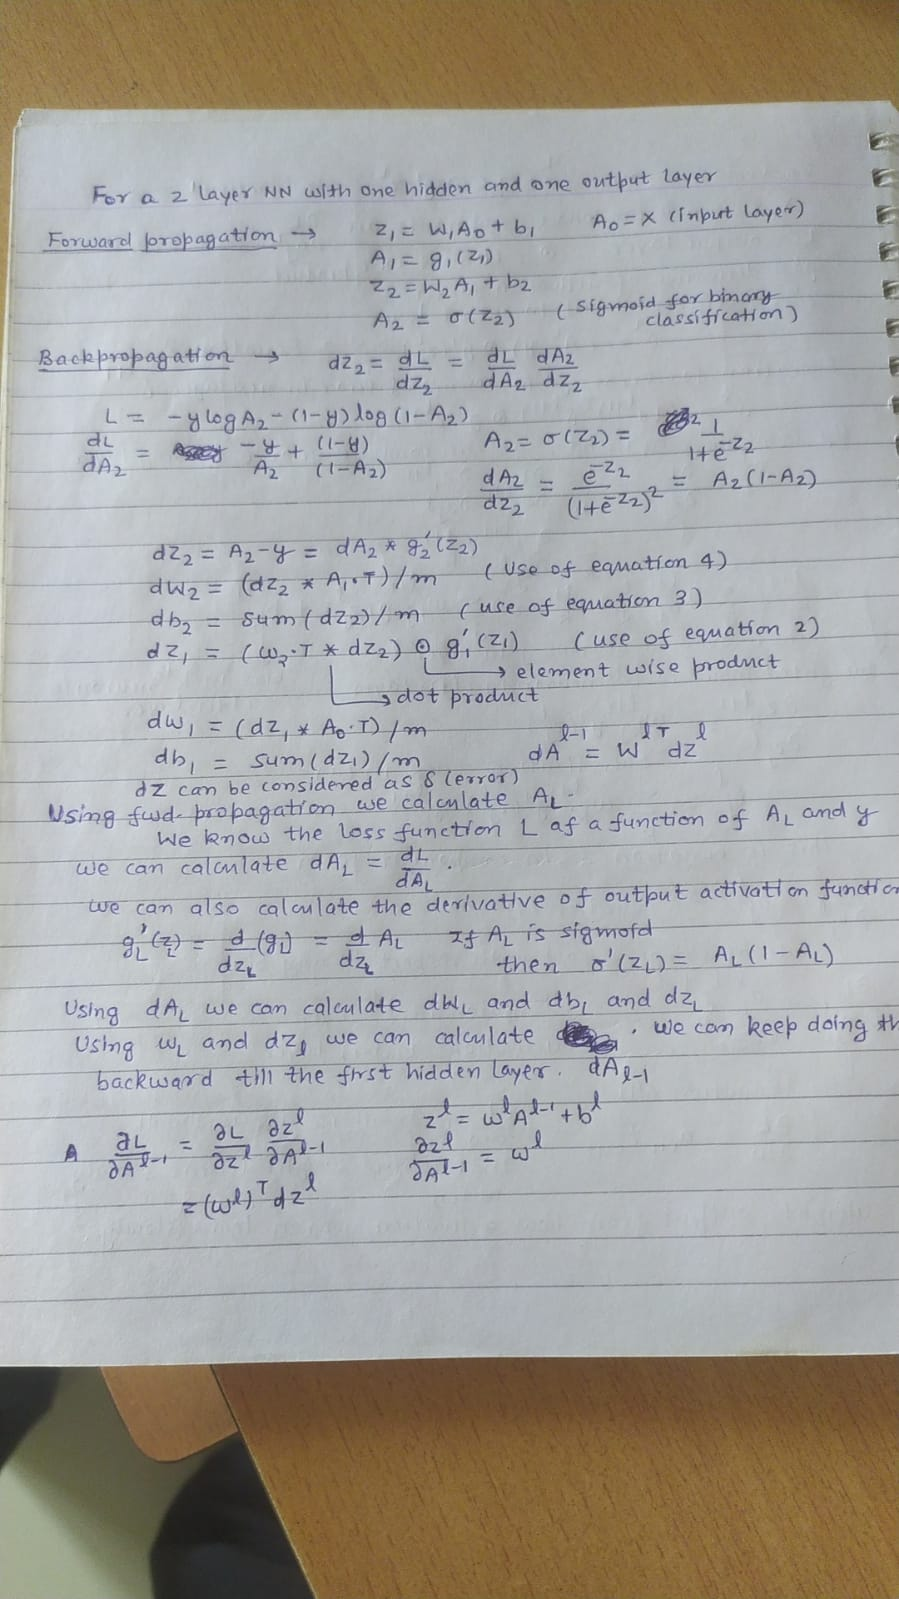

## **1. Forward Propagation (One Pass)**
Forward propagation is the process of passing input data through a neural network layer by layer to compute the predicted output.

### **Neural Network Setup (2-Layer NN)**
We assume a **2-layer neural network** (1 hidden layer and 1 output layer). 

- Input: $ A_0 = X $ (features)
- Weights: $ W_1, W_2 $
- Biases: $ b_1, b_2 $
- Activations: $ A_1, A_2 $
- Activation functions: 
  - $ g_1(Z_1) $ (for hidden layer)
  - $ \sigma(Z_2) $ (sigmoid for output, useful in binary classification)
- Loss function: **Binary Cross-Entropy**:
  $$
  L = - \left( y \log(A_2) + (1 - y) \log(1 - A_2) \right)
  $$

### **Step-by-Step Forward Pass:**
1. **Compute first hidden layer (Linear + Activation)**
   $$
   Z_1 = W_1 A_0 + b_1
   $$
   $$
   A_1 = g_1(Z_1)
   $$

2. **Compute output layer (Linear + Activation)**
   $$
   Z_2 = W_2 A_1 + b_2
   $$
   $$
   A_2 = \sigma(Z_2) = \frac{1}{1 + e^{-Z_2}}
   $$

3. **Compute Loss $ L $**
   $$
   L = - \left( y \log(A_2) + (1 - y) \log(1 - A_2) \right)
   $$

At this point, the forward pass is complete, and we have the network’s prediction $ A_2 $.


# **2. Backward Propagation (One Pass)**
Backward propagation calculates gradients of the loss with respect to weights and biases, allowing us to update parameters using **Gradient Descent**.

### **Step-by-Step Backward Pass:**
Each derivative is computed using the **four fundamental equations of backpropagation**.

### **Step 1: Compute Gradient of Loss w.r.t. Output Activation $ A_2 $**
The loss function is:
$$
L = - \left( y \log(A_2) + (1 - y) \log(1 - A_2) \right)
$$

Derivative w.r.t $ A_2 $:
$$
\frac{\partial L}{\partial A_2} = \frac{A_2 - y}{A_2 (1 - A_2)}
$$

### **Step 2: Compute Error Term for Output Layer $ dZ_2 $**
Using the **first fundamental equation**:
$$
dZ_2 = \frac{\partial L}{\partial A_2} \cdot \frac{\partial A_2}{\partial Z_2}
$$

Since $ A_2 = \sigma(Z_2) $, we use its derivative:
$$
\frac{\partial A_2}{\partial Z_2} = A_2(1 - A_2)
$$

So,
$$
dZ_2 = A_2 - y
$$

**(This equation is present in the image: $ dZ_2 = A_2 - y $).**

### **Step 3: Compute Gradients of Weights and Biases for Output Layer**
Using the **second fundamental equation**:
$$
dW_2 = \frac{1}{m} dZ_2 A_1^T
$$

**(This equation appears in the image: $ dW_2 = (dZ_2 \cdot A_1^T) / m $).**

Using the **third fundamental equation**:
$$
db_2 = \frac{1}{m} \sum dZ_2
$$

**(This equation appears in the image: $ db_2 = \sum dZ_2 / m $).**

### **Step 4: Backpropagate Error to Previous Layer**
Using the **fourth fundamental equation**:
$$
dZ_1 = (W_2^T dZ_2) \cdot g_1'(Z_1)
$$

If $ g_1 $ is a ReLU or sigmoid function, we compute its derivative and multiply element-wise.

**(This equation appears in the image: $ dZ_1 = (W_2^T \cdot dZ_2) \cdot g_1'(Z_1) $).**

### **Step 5: Compute Gradients for First Layer**
Using the **second fundamental equation** again:
$$
dW_1 = \frac{1}{m} dZ_1 A_0^T
$$

Using the **third fundamental equation** again:
$$
db_1 = \frac{1}{m} \sum dZ_1
$$

Now, the gradients $ dW_1, db_1, dW_2, db_2 $ are used to update parameters in gradient descent:

$$
W = W - \alpha dW
$$

$$
b = b - \alpha db
$$

---

# **Summary**
1. **Forward Propagation:**
   - Computes activations $ A_1, A_2 $ using linear transformation + activation functions.
   - Calculates loss $ L $ based on predictions.

2. **Backward Propagation:**
   - Computes gradient of the loss w.r.t. output $ A_2 $.
   - Uses **four fundamental equations of backpropagation** to compute:
     - Error signal $ dZ $.
     - Weight gradients $ dW $.
     - Bias gradients $ db $.
     - Propagation of error back to previous layers.

### **The Four Fundamental Equations of Backpropagation:**
| Equation | Purpose |
|-----------|--------------------------------------|
| $ dZ^l = \frac{\partial L}{\partial Z^l} $ | Error term at layer $ l $ |
| $ dW^l = \frac{1}{m} dZ^l (A^{l-1})^T $ | Gradient of weight matrix |
| $ db^l = \frac{1}{m} \sum dZ^l $ | Gradient of bias |
| $ dZ^{l-1} = (W^l)^T dZ^l \cdot g'(Z^{l-1}) $ | Propagation of error backward |